In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/extended-football-stats-for-european-leagues-xg/understat.com.csv
/kaggle/input/extended-football-stats-for-european-leagues-xg/understat_per_game.csv


In [2]:
df=pd.read_csv("/kaggle/input/extended-football-stats-for-european-leagues-xg/understat_per_game.csv")

In [3]:
df.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [5]:
sns.set_style("whitegrid")

In [6]:
df.describe()

year            xG           xGA          npxG         npxGA  \
count  24580.000000  24580.000000  24580.000000  24580.000000  24580.000000   
mean    2016.478438      1.309694      1.309694      1.193872      1.193872   
std        1.699285      0.841109      0.841109      0.774719      0.774719   
min     2014.000000      0.000000      0.000000      0.000000      0.000000   
25%     2015.000000      0.681165      0.681165      0.621734      0.621734   
50%     2016.000000      1.150595      1.150595      1.040425      1.040425   
75%     2018.000000      1.769455      1.769455      1.597640      1.597640   
max     2019.000000      6.630490      6.630490      6.610910      6.610910   

               deep  deep_allowed        scored        missed          xpts  \
count  24580.000000  24580.000000  24580.000000  24580.000000  24580.000000   
mean       5.806957      5.806957      1.341009      1.341009      1.378563   
std        4.048151      4.048151      1.244176      1.244176      0.823751   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000      0.000000      0.000000      0.673950   
50%        5.000000      5.000000      1.000000      1.000000      1.328900   
75%        8.000000      8.000000      2.000000      2.000000      2.051025   
max       42.000000     42.000000     10.000000     10.000000      3.000000   

       ...         npxGD     ppda_coef      ppda_att      ppda_def  \
count  ...  2.458000e+04  24580.000000  24580.000000  24580.000000   
mean   ...  2.890735e-19     10.904386    239.612327     24.349593   
std    ...  1.205702e+00      6.163586     83.998463      7.172098   
min    ... -6.007965e+00      0.000000      0.000000      0.000000   
25%    ... -7.306208e-01      6.962963    179.000000     19.000000   
50%    ...  0.000000e+00      9.500000    231.000000     24.000000   
75%    ...  7.306208e-01     13.095622    290.000000     29.000000   
max    ...  6.007965e+00    152.000000    764.000000     65.000000   

         oppda_coef     oppda_att     oppda_def       xG_diff      xGA_diff  \
count  24580.000000  24580.000000  24580.000000  24580.000000  24580.000000   
mean      10.904386    239.612327     24.349593     -0.031315     -0.031315   
std        6.163586     83.998463      7.172098      0.951362      0.951362   
min        0.000000      0.000000      0.000000     -5.943560     -5.943560   
25%        6.962963    179.000000     19.000000     -0.593431     -0.593431   
50%        9.500000    231.000000     24.000000      0.092995      0.092995   
75%       13.095622    290.000000     29.000000      0.588477      0.588477   
max      152.000000    764.000000     65.000000      5.063130      5.063130   

          xpts_diff  
count  24580.000000  
mean       0.004723  
std        1.051608  
min       -2.965500  
25%       -0.679800  
50%        0.093950  
75%        0.739575  
max        2.940900  

[8 rows x 24 columns]

In [7]:
print(df.isnull().sum())

league          0
year            0
h_a             0
xG              0
xGA             0
npxG            0
npxGA           0
deep            0
deep_allowed    0
scored          0
missed          0
xpts            0
result          0
date            0
wins            0
draws           0
loses           0
pts             0
npxGD           0
ppda_coef       0
ppda_att        0
ppda_def        0
oppda_coef      0
oppda_att       0
oppda_def       0
team            0
xG_diff         0
xGA_diff        0
xpts_diff       0
dtype: int64


In [ ]:
df.info()

### UNIVARIATE ANALYSIS

## Numerical Data

In [8]:
num_cols = ['xG', 'xGA', 'npxG', 'npxGA', 'scored', 'missed', 
            'xpts', 'xG_diff', 'xGA_diff', 'xpts_diff', 'ppda_coef', 
            'oppda_coef', 'deep', 'deep_allowed', 'npxGD', 
            'ppda_att', 'ppda_def', 'oppda_att', 'oppda_def']


1. Histograms and KDE

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


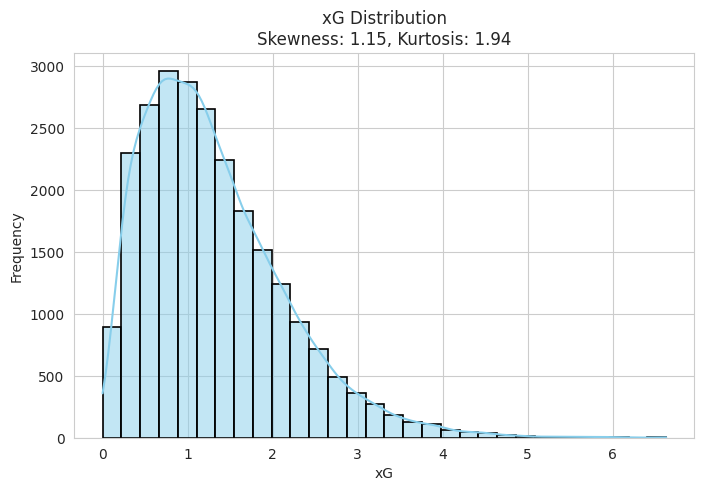

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


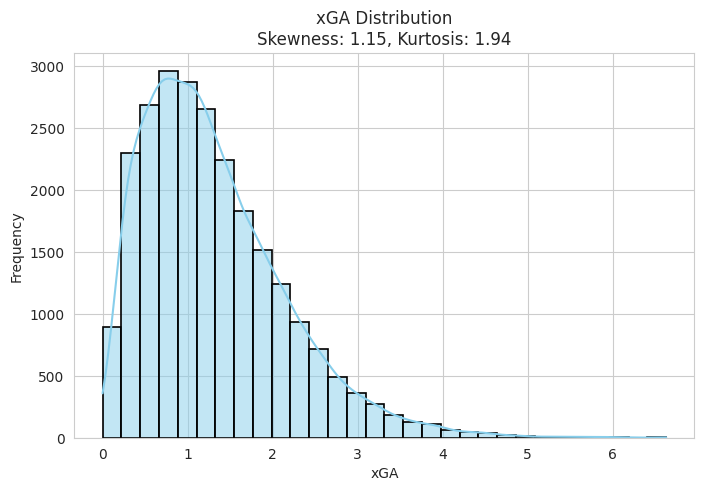

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


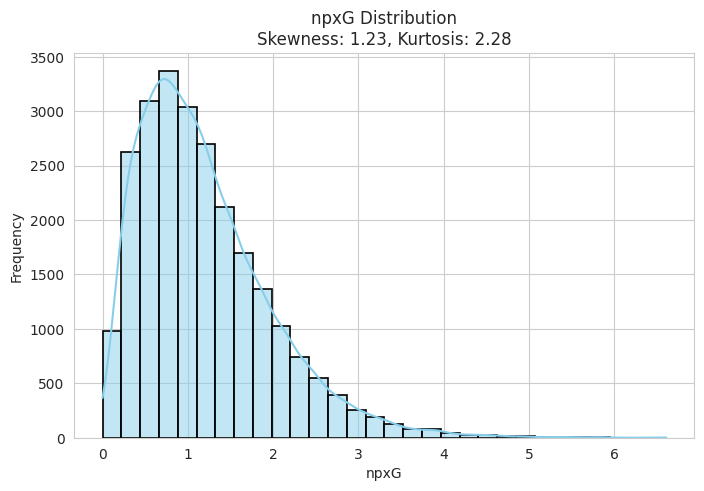

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


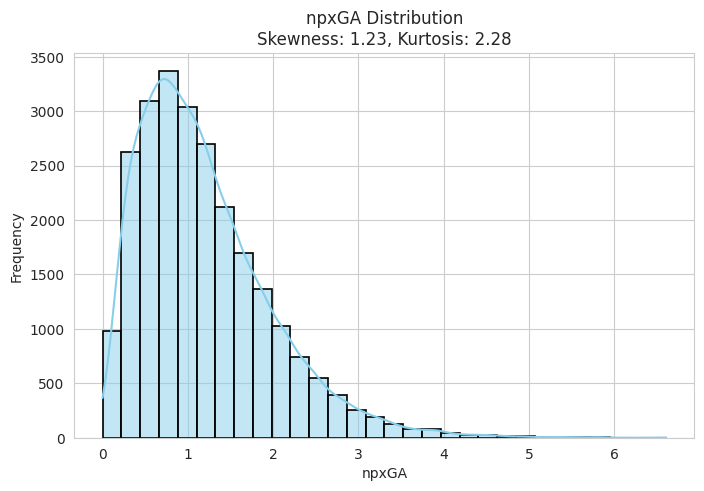

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


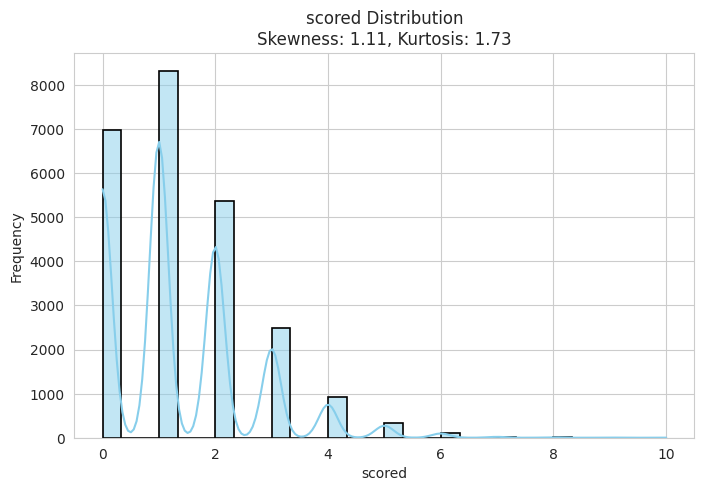

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


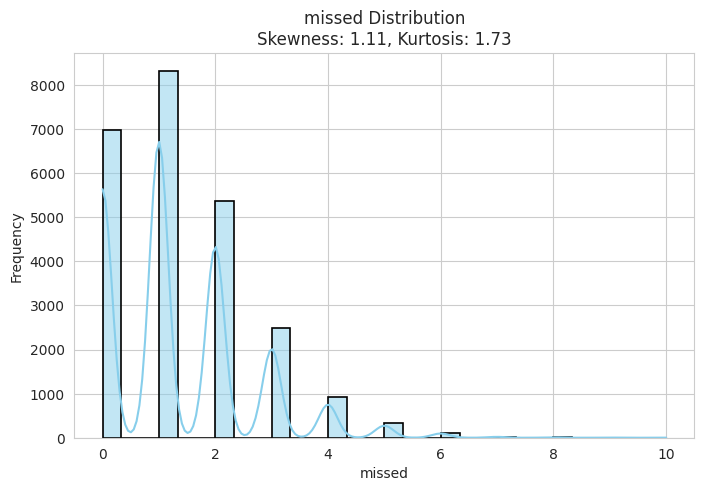

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


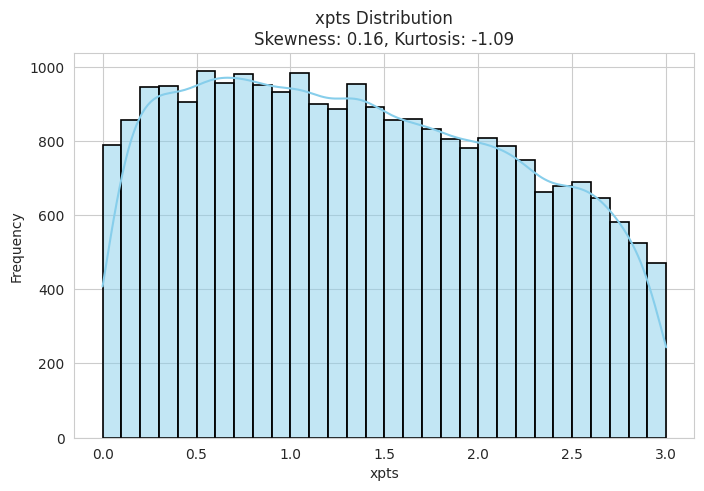

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


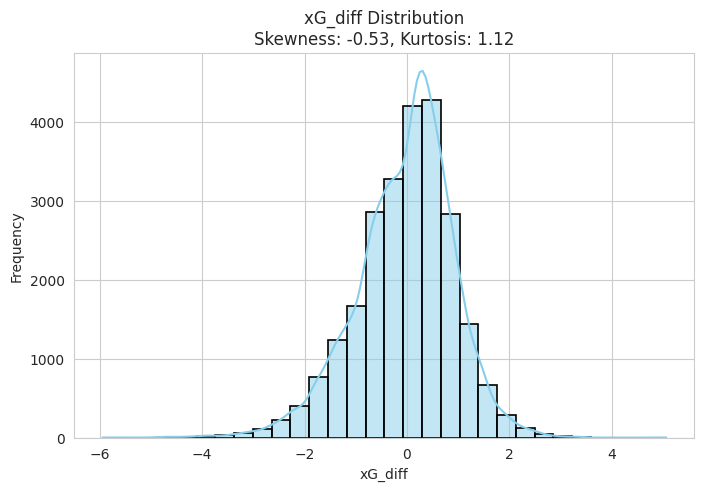

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


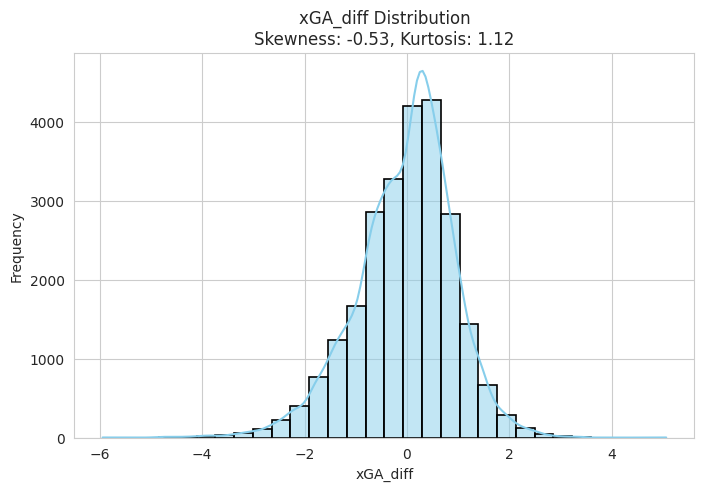

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


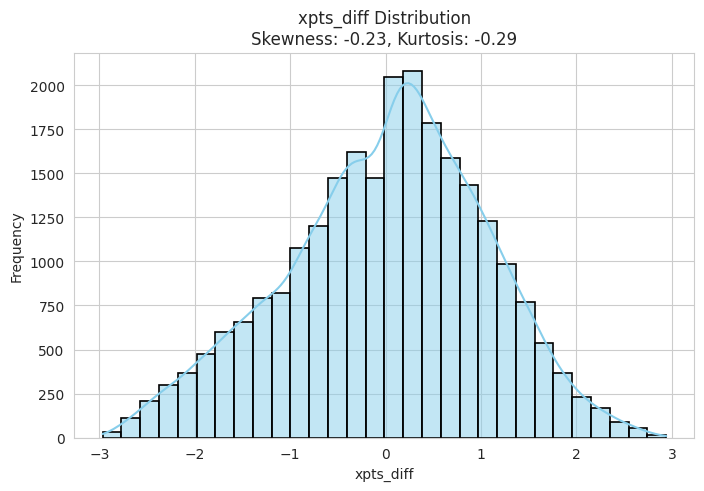

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


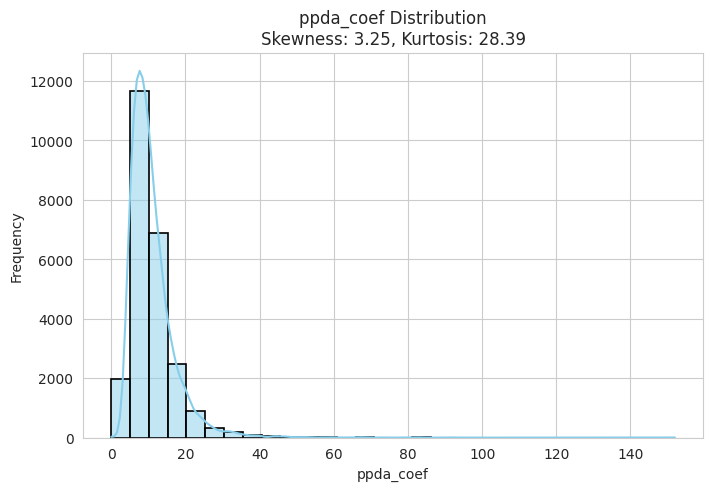

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


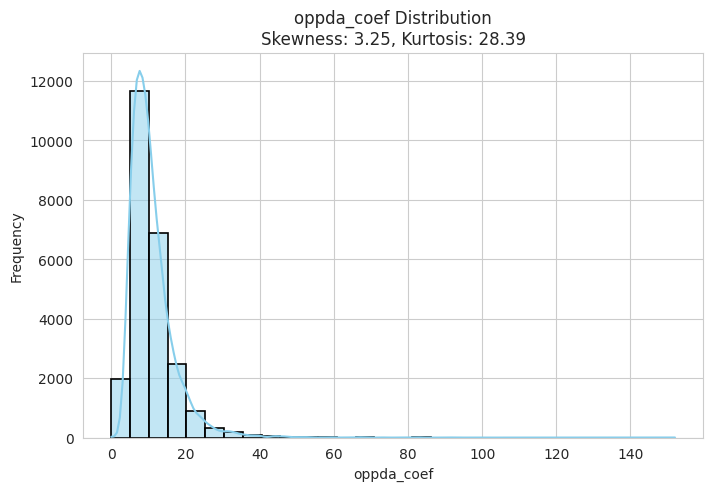

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


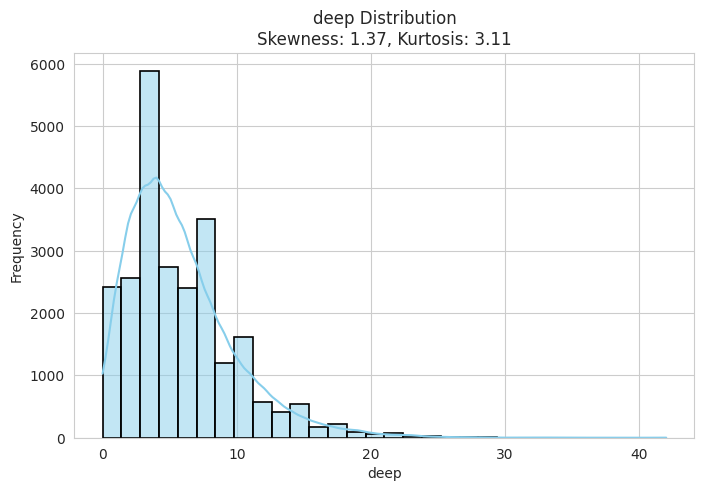

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


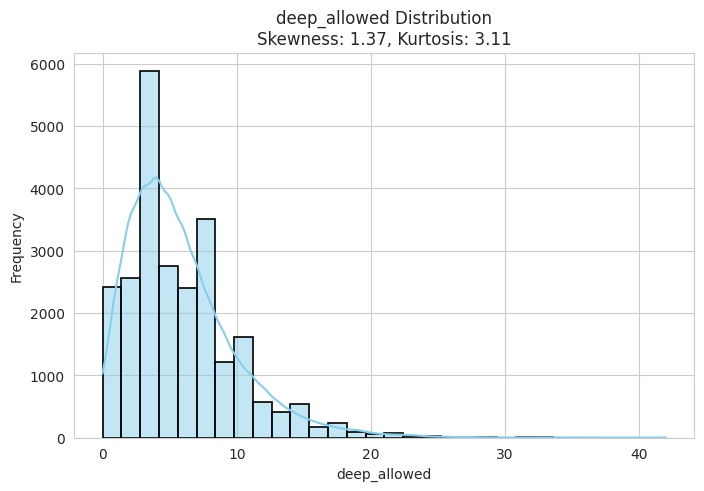

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


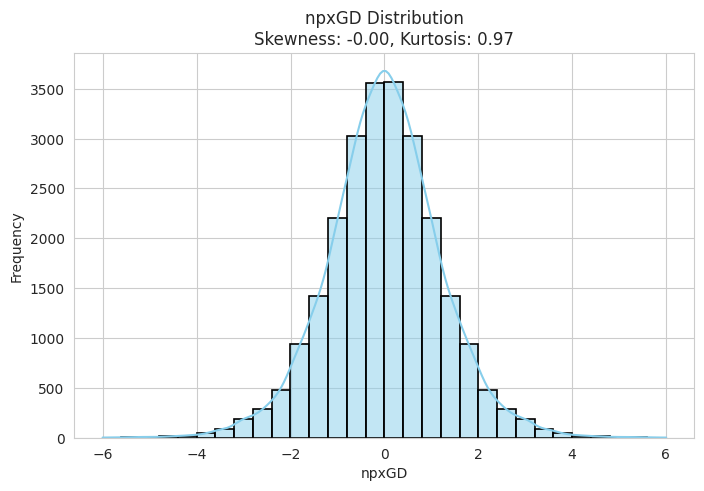

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


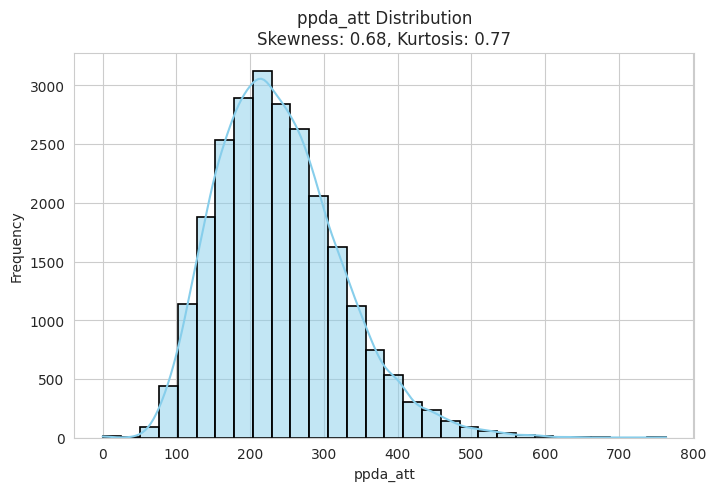

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


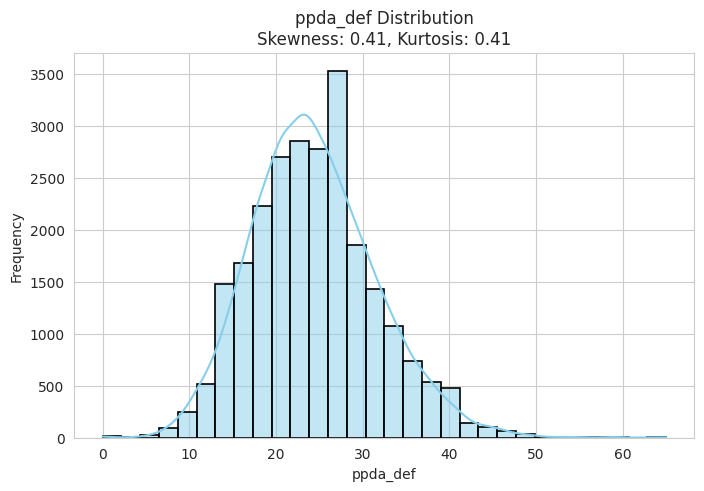

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


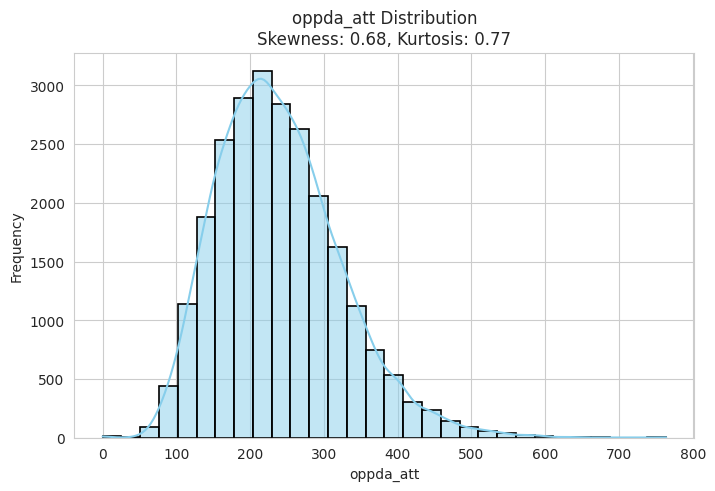

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


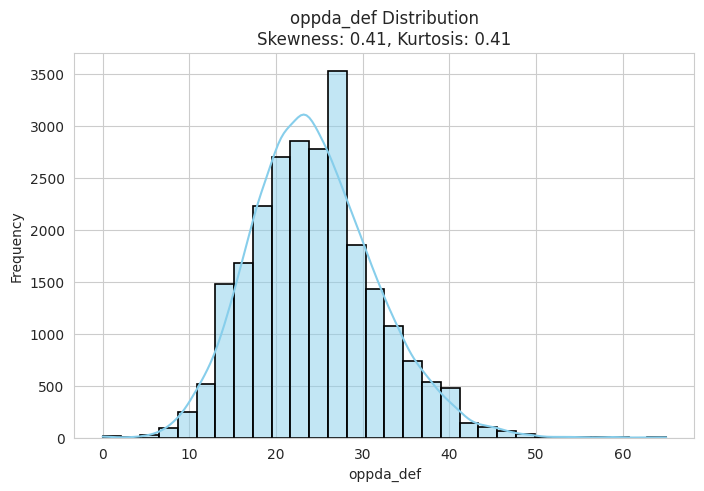

In [9]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
    plt.title(f'{col} Distribution\nSkewness: {skew(df[col]):.2f}, Kurtosis: {kurtosis(df[col]):.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

2. Boxplots

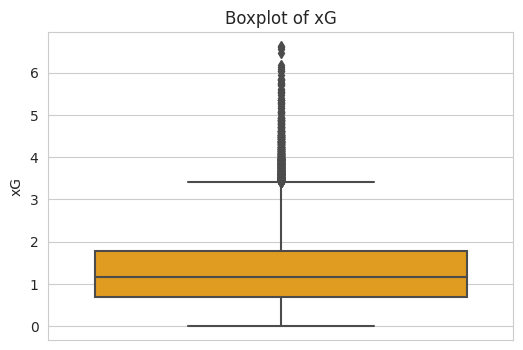

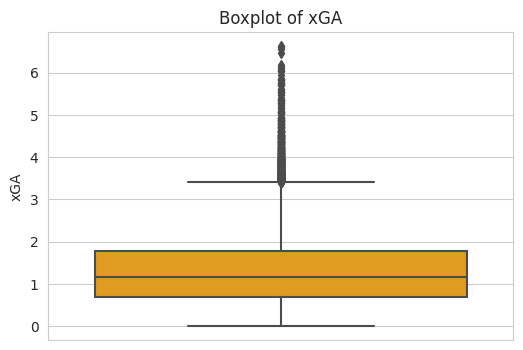

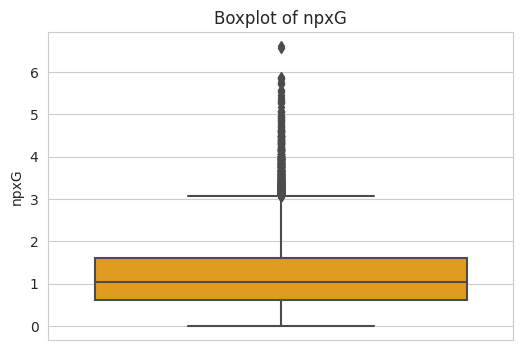

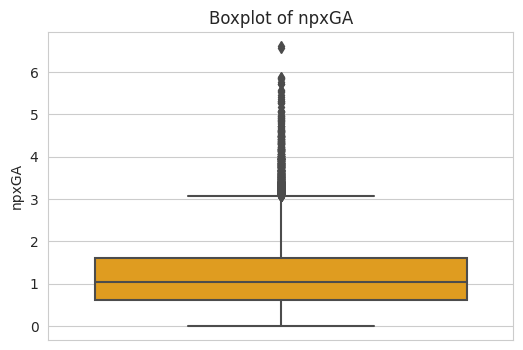

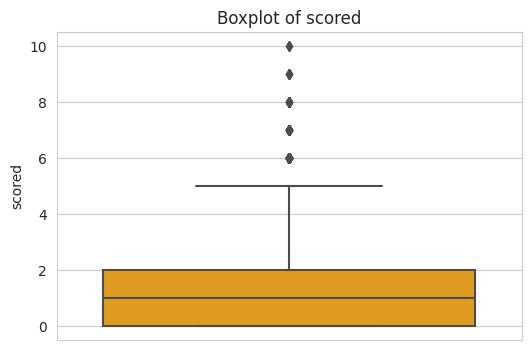

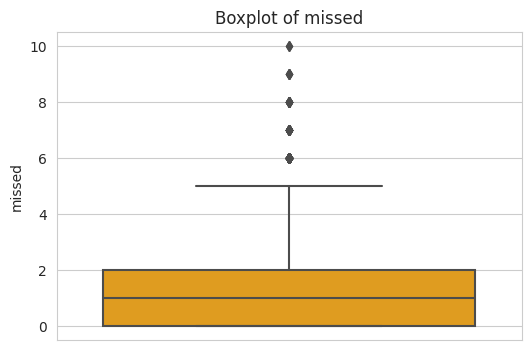

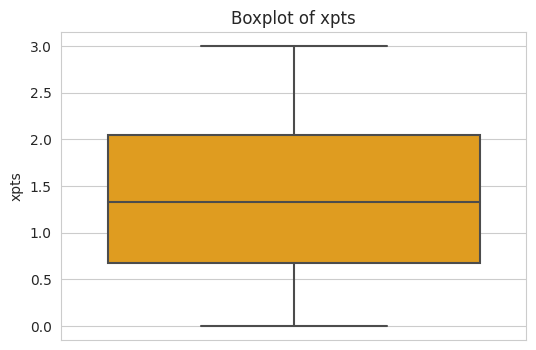

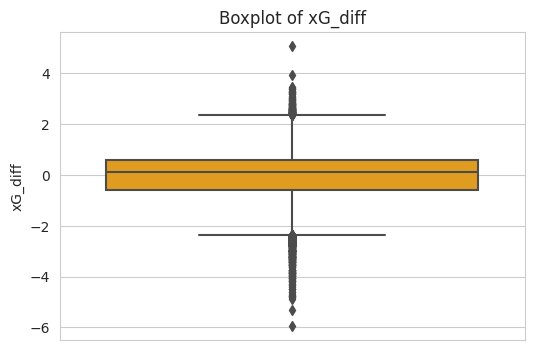

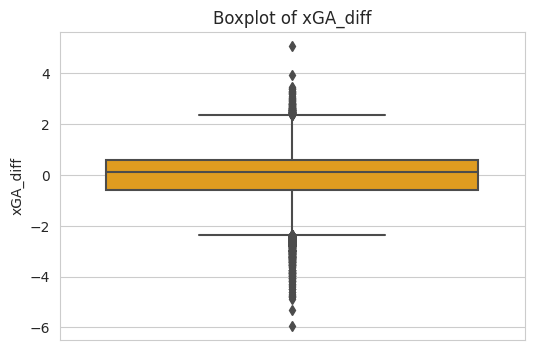

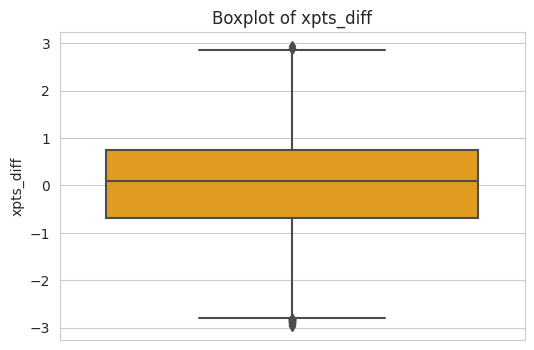

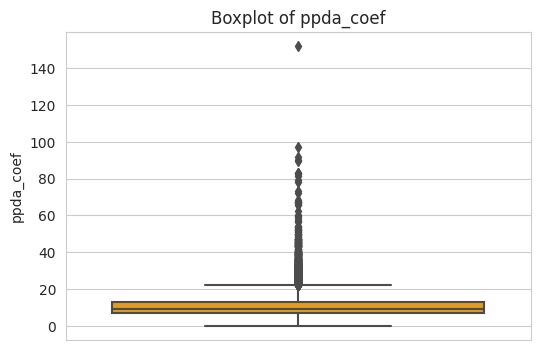

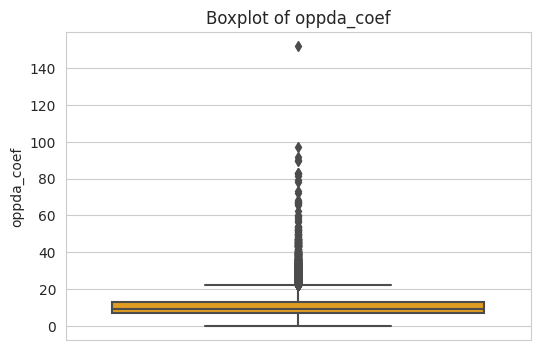

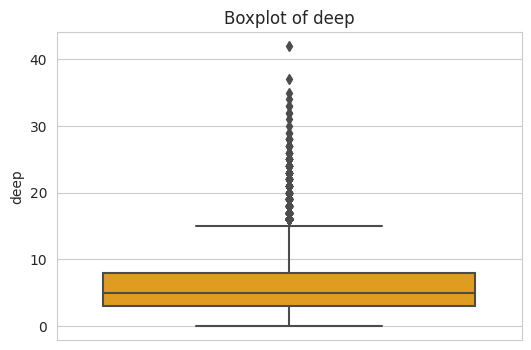

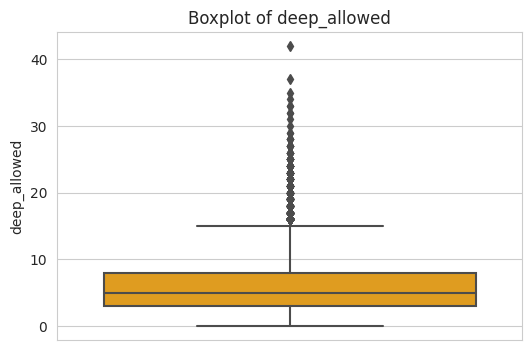

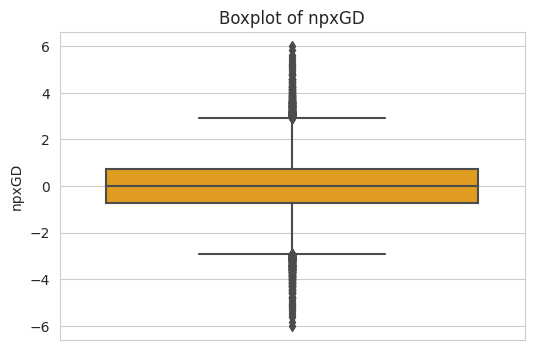

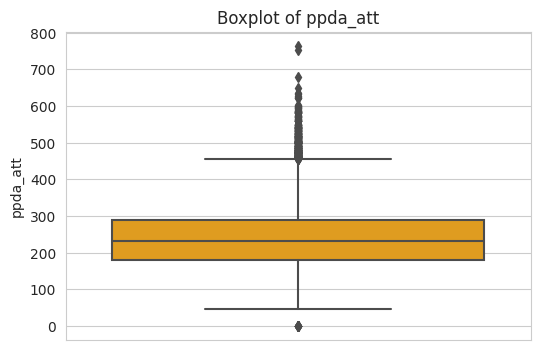

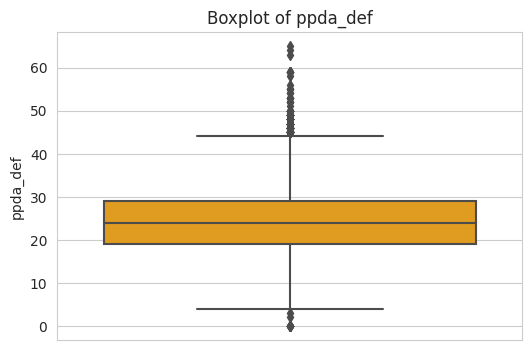

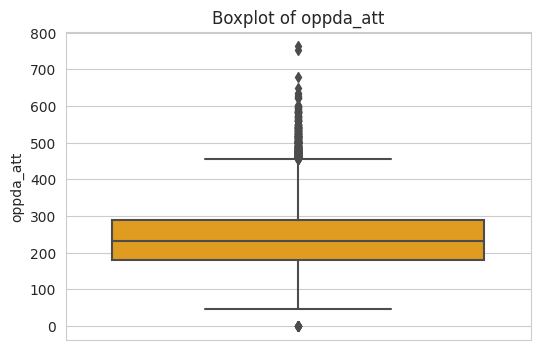

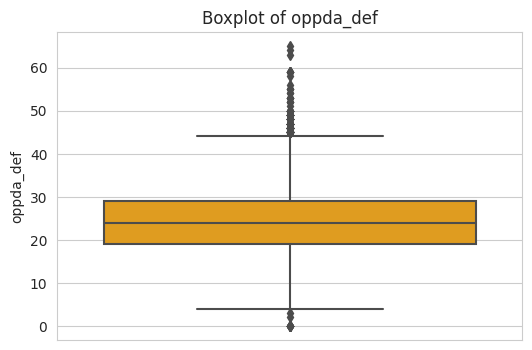

In [10]:
# Individual Boxplots
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

3. Strip Plot

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


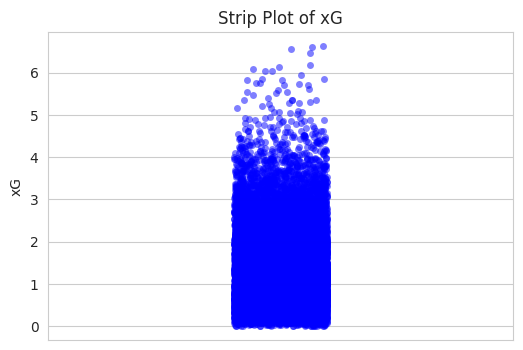

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


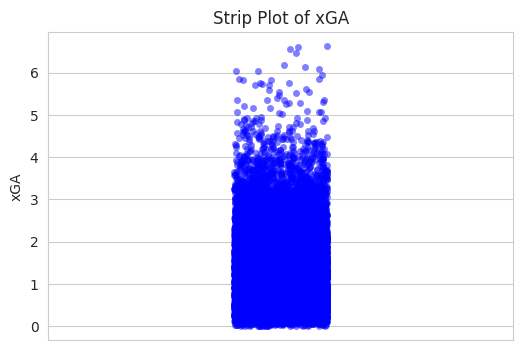

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


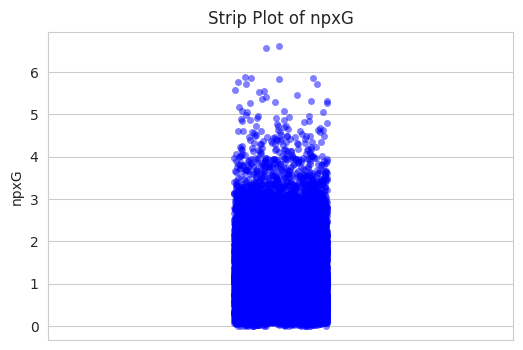

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


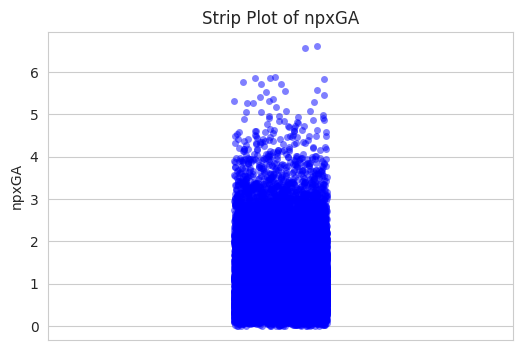

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


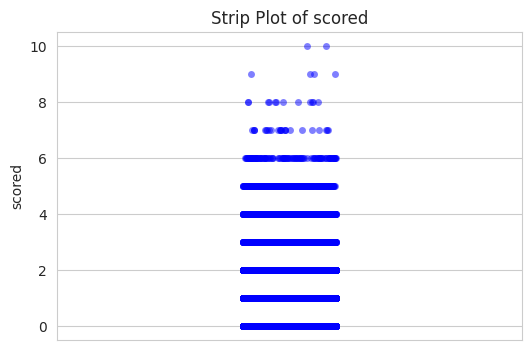

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


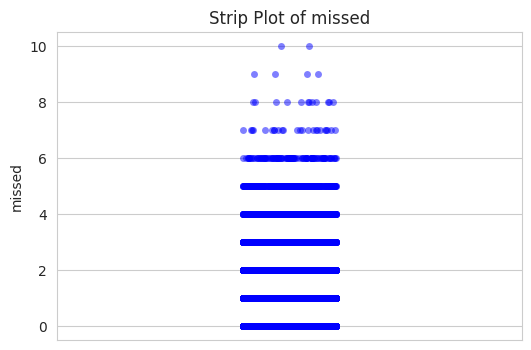

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


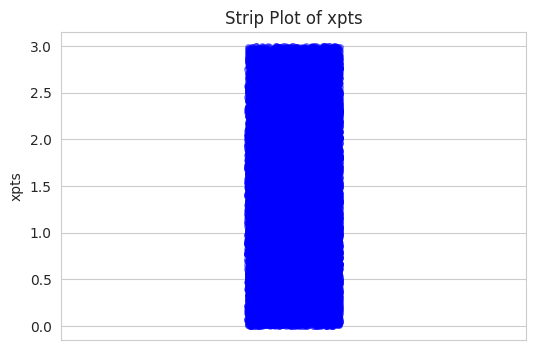

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


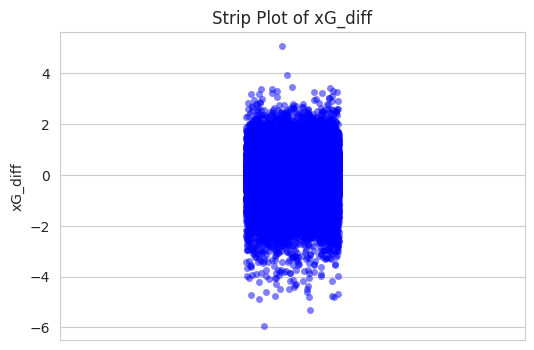

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


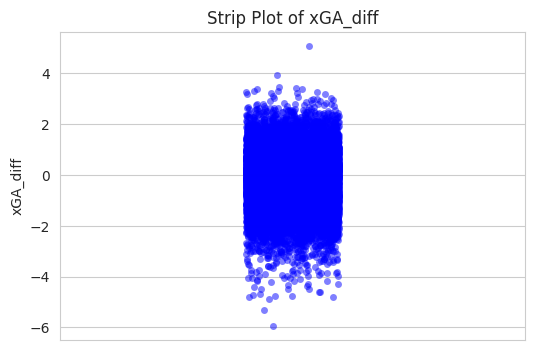

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


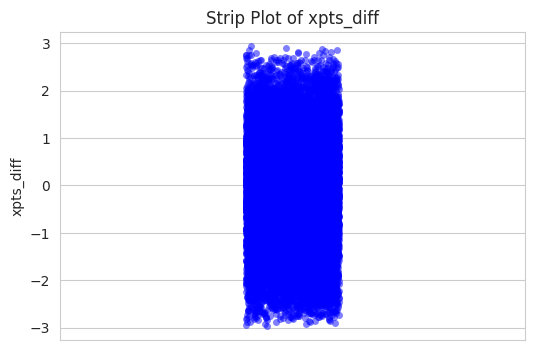

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


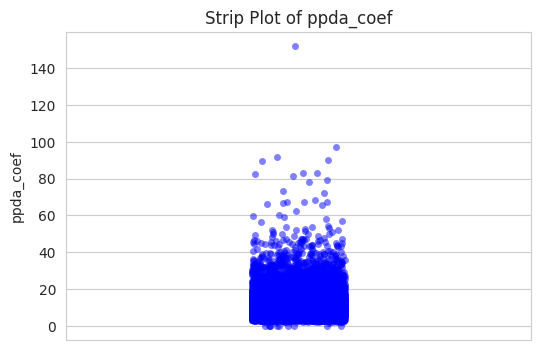

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


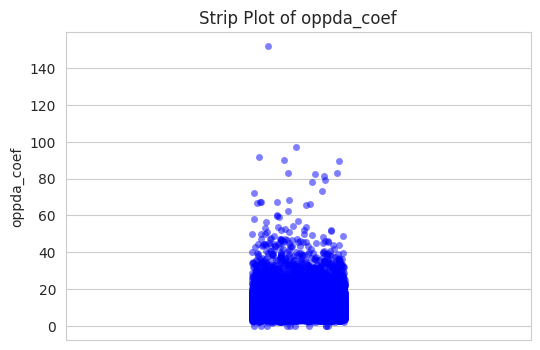

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


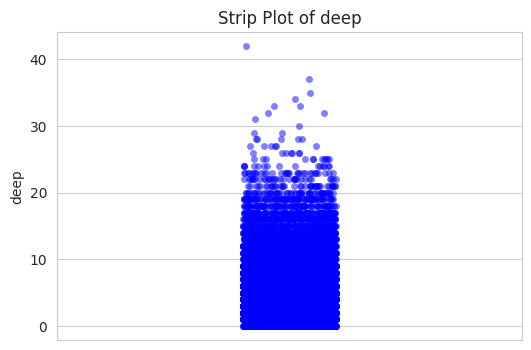

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


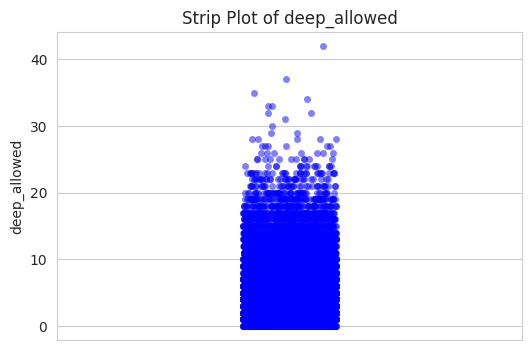

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


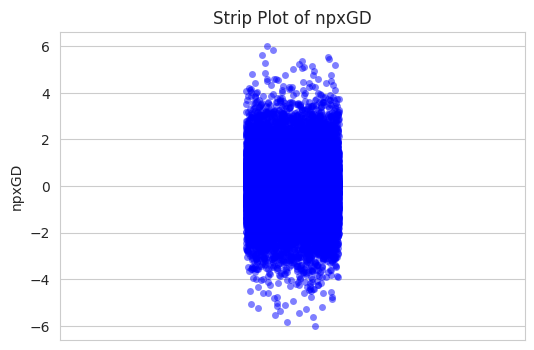

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


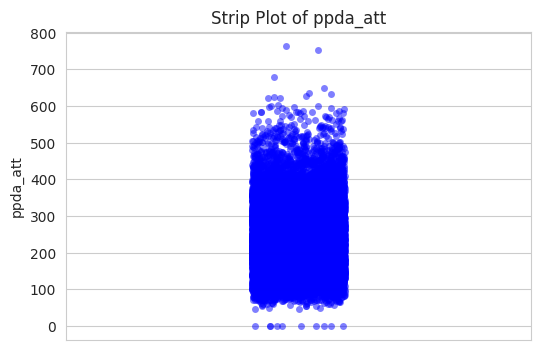

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


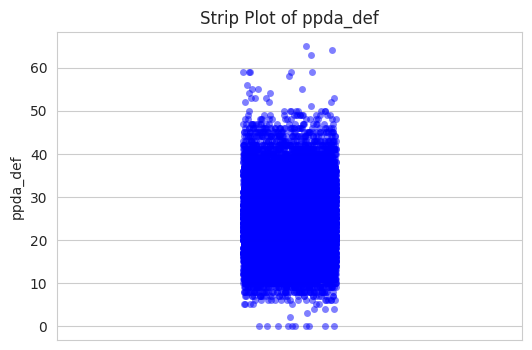

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


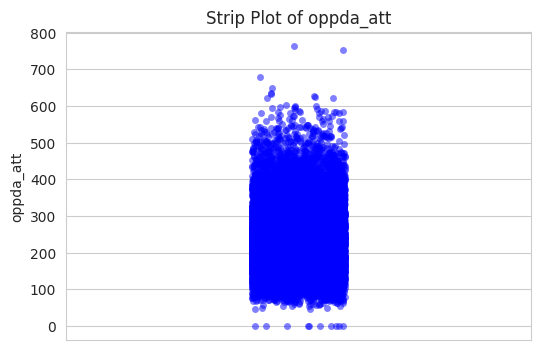

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


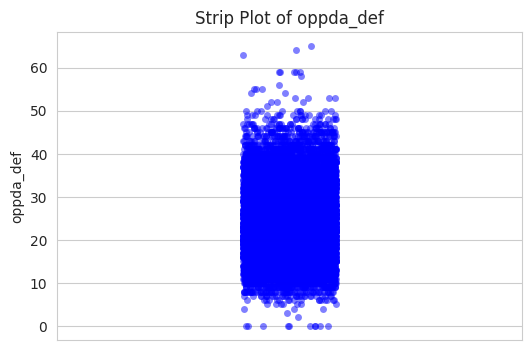

In [11]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.stripplot(y=df[col], color='blue', jitter=True, alpha=0.5)
    plt.title(f'Strip Plot of {col}')
    plt.show()

## Categorical Data

In [12]:
categorical_cols = ['league', 'h_a', 'result', 'team']

In [13]:
for col in categorical_cols:  # Selecting categorical columns
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())


league Value Counts:
league
EPL           4560
La_liga       4560
Serie_A       4550
Ligue_1       4358
Bundesliga    3672
RFPL          2880
Name: count, dtype: int64

h_a Value Counts:
h_a
h    12290
a    12290
Name: count, dtype: int64

result Value Counts:
result
w    9189
l    9189
d    6202
Name: count, dtype: int64

team Value Counts:
team
AC Milan                  228
Sampdoria                 228
Roma                      228
Atalanta                  228
Inter                     228
                         ... 
FC Tambov                  30
Torpedo Moscow             30
Tom Tomsk                  30
FC Yenisey Krasnoyarsk     30
Brest                      28
Name: count, Length: 168, dtype: int64


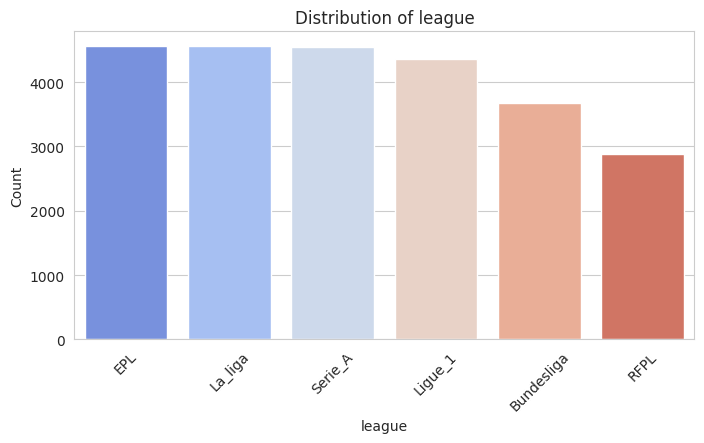

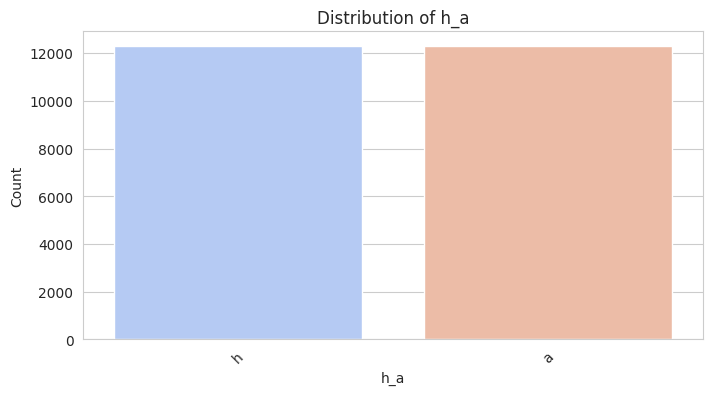

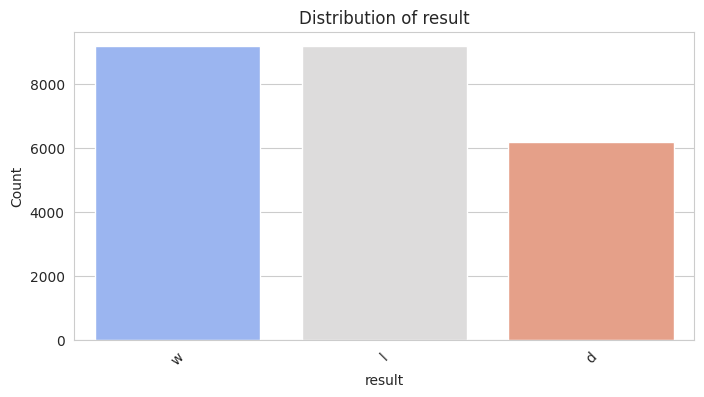

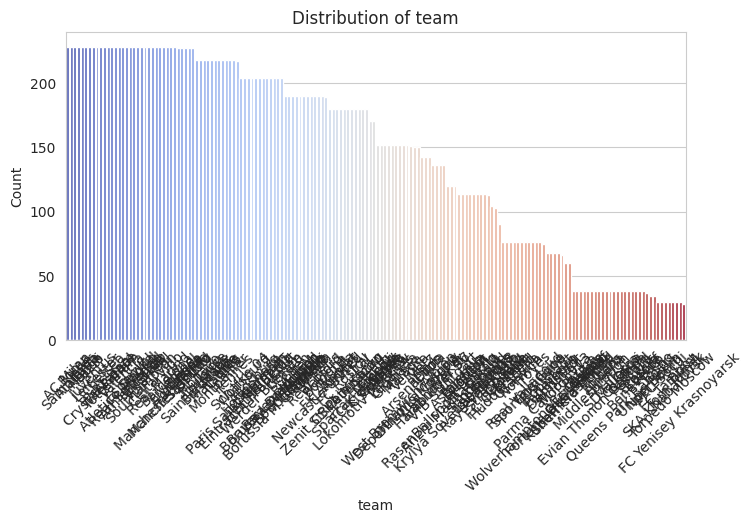

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='coolwarm', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  
    plt.ylabel('Count')
    plt.show()

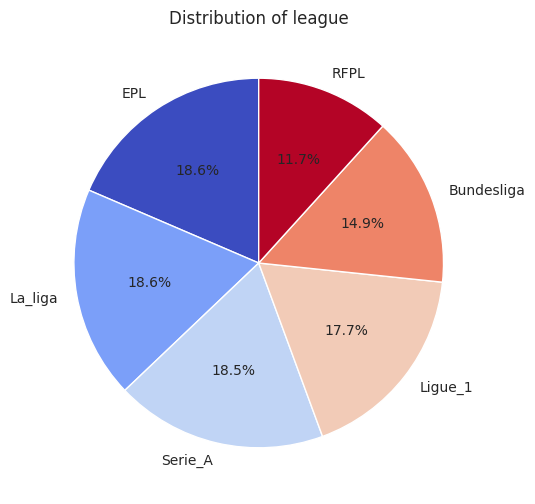

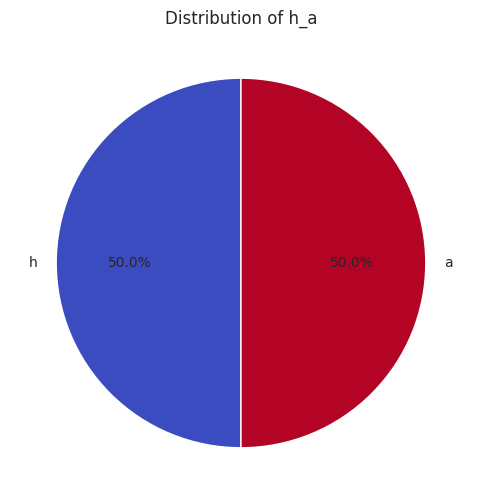

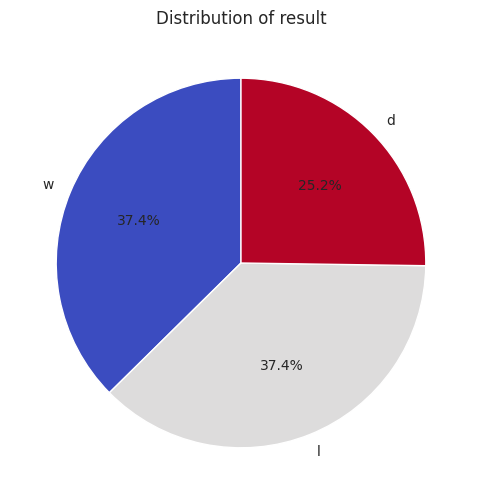

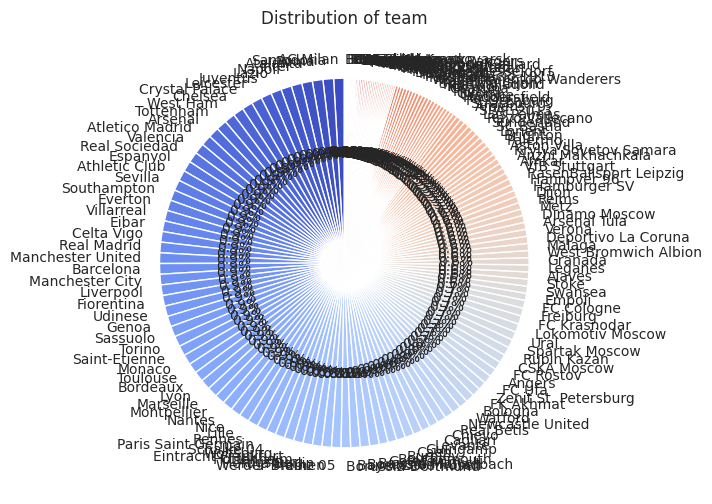

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  
    plt.show()

### Univariate Analysis

## 1. Numerical Analysis

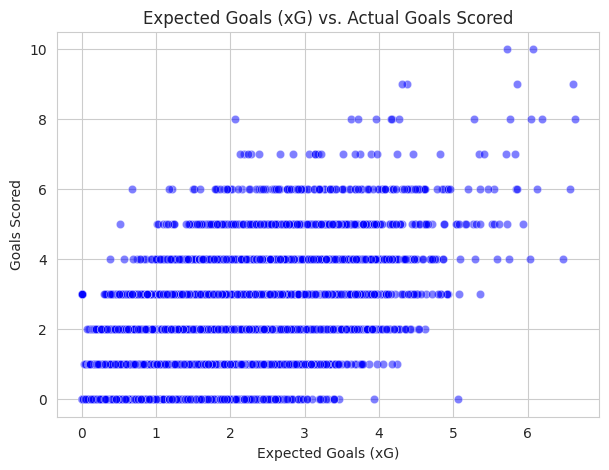

In [21]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['xG'], y=df['scored'], alpha=0.5, color='blue')
plt.title('Expected Goals (xG) vs. Actual Goals Scored')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored')
plt.show()

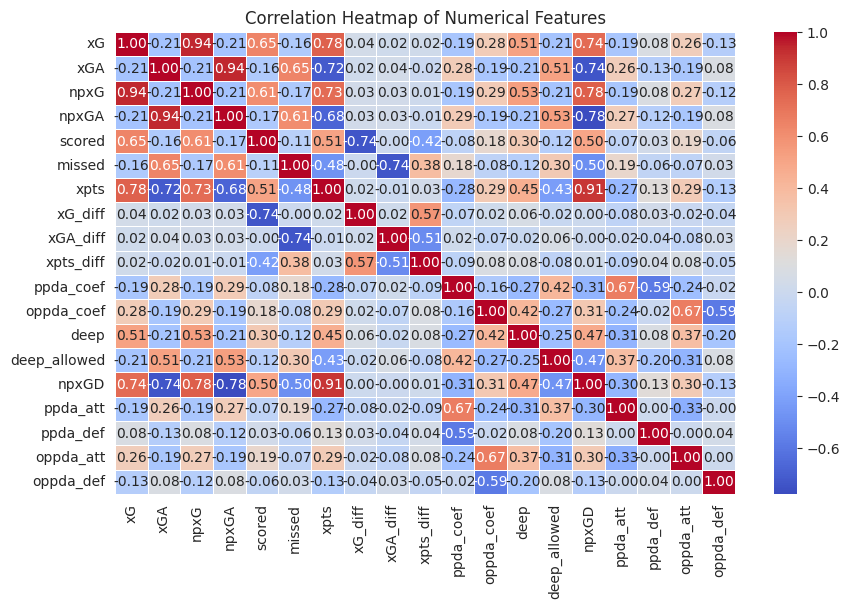

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

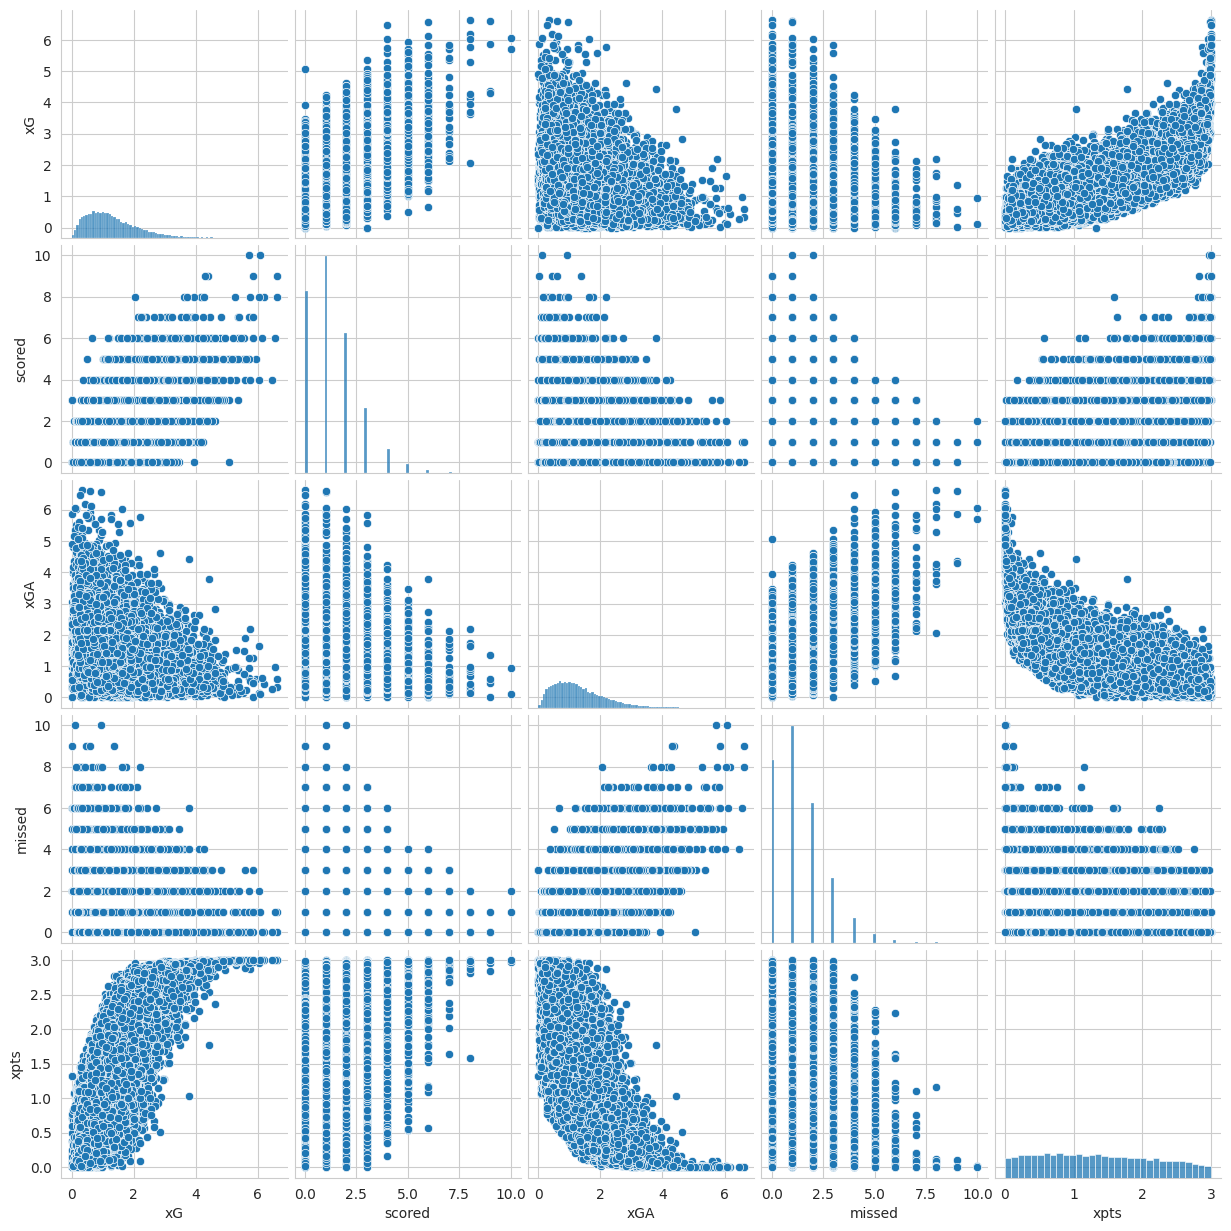

In [23]:
sns.pairplot(df[num_cols][['xG', 'scored', 'xGA', 'missed', 'xpts']])
plt.show()

## 2.Numerical Categorical

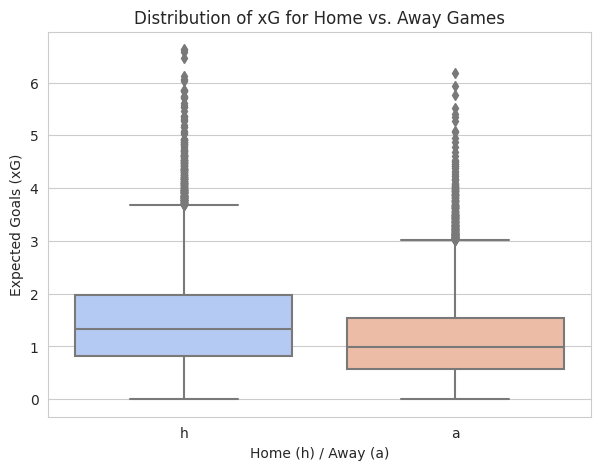

In [24]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['h_a'], y=df['xG'], palette='coolwarm')
plt.title('Distribution of xG for Home vs. Away Games')
plt.xlabel('Home (h) / Away (a)')
plt.ylabel('Expected Goals (xG)')
plt.show()

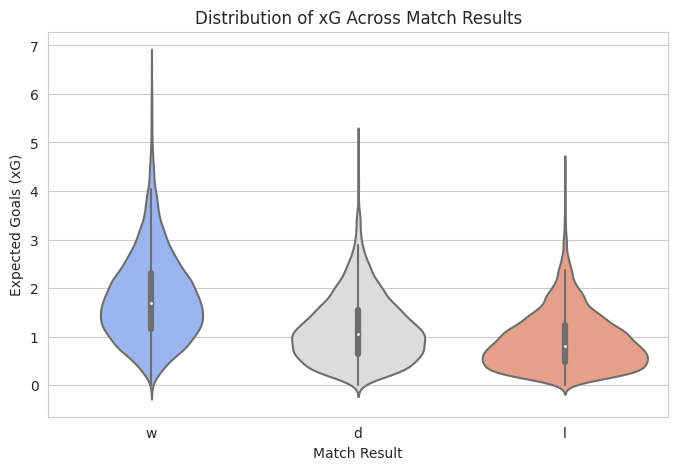

In [25]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['result'], y=df['xG'], palette='coolwarm')
plt.title('Distribution of xG Across Match Results')
plt.xlabel('Match Result')
plt.ylabel('Expected Goals (xG)')
plt.show()

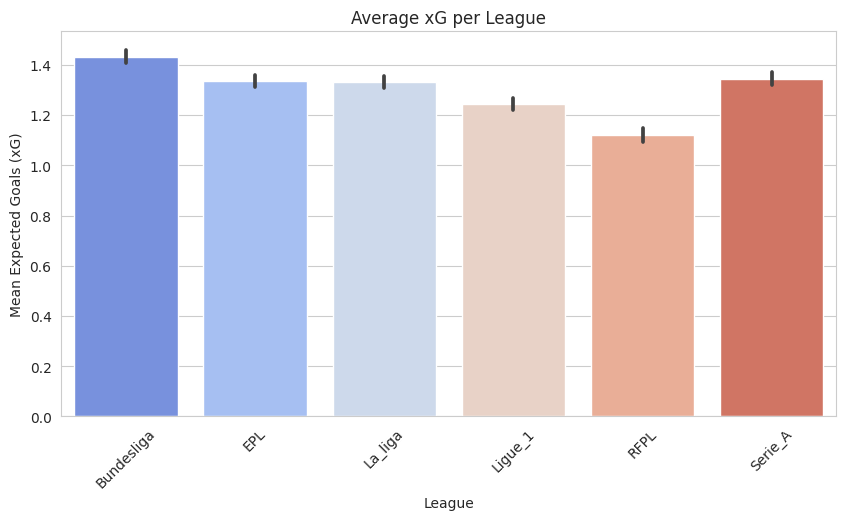

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['league'], y=df['xG'], estimator=np.mean, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average xG per League')
plt.xlabel('League')
plt.ylabel('Mean Expected Goals (xG)')
plt.show()

3. Categorical vs Categorical

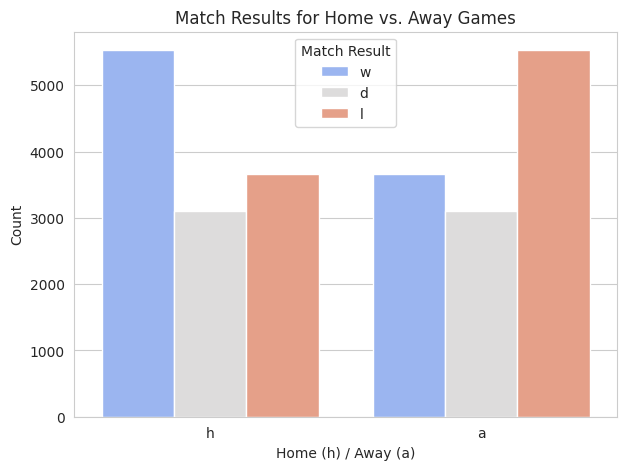

In [27]:
plt.figure(figsize=(7, 5))
sns.countplot(x=df['h_a'], hue=df['result'], palette='coolwarm')
plt.title('Match Results for Home vs. Away Games')
plt.xlabel('Home (h) / Away (a)')
plt.ylabel('Count')
plt.legend(title='Match Result')
plt.show()

In [28]:
pd.crosstab(df['league'], df['result'])

result         d     l     w
league                      
Bundesliga   902  1385  1385
EPL         1092  1734  1734
La_liga     1146  1707  1707
Ligue_1     1132  1613  1613
RFPL         790  1045  1045
Serie_A     1140  1705  1705

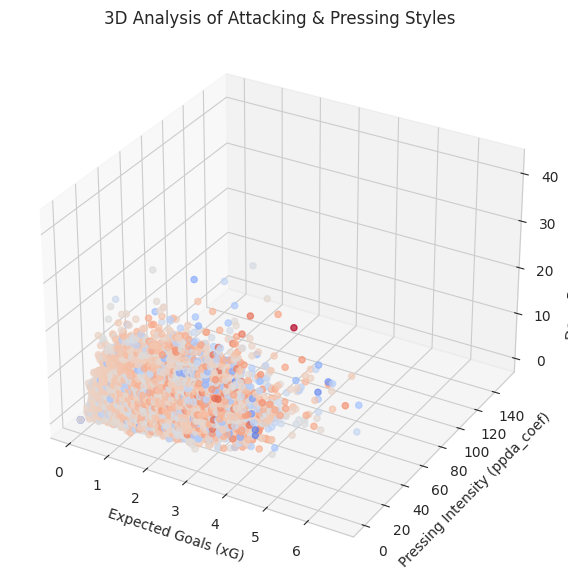

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['xG'], df['ppda_coef'], df['deep'], c=df['xG_diff'], cmap='coolwarm', alpha=0.7)
ax.set_xlabel("Expected Goals (xG)")
ax.set_ylabel("Pressing Intensity (ppda_coef)")
ax.set_zlabel("Deep Passes Completed")
ax.set_title("3D Analysis of Attacking & Pressing Styles")

plt.show()


### INSIGHTS

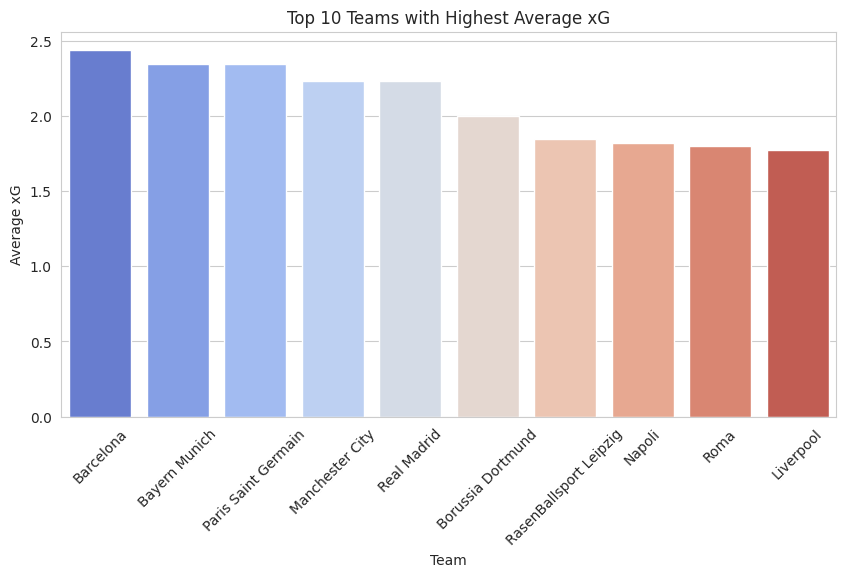

In [30]:
# Top 10 teams with highest average xG
top_xG_teams = df.groupby('team')['xG'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_xG_teams.index, y=top_xG_teams.values, palette='coolwarm')
plt.title('Top 10 Teams with Highest Average xG')
plt.xlabel('Team')
plt.ylabel('Average xG')
plt.xticks(rotation=45)
plt.show()

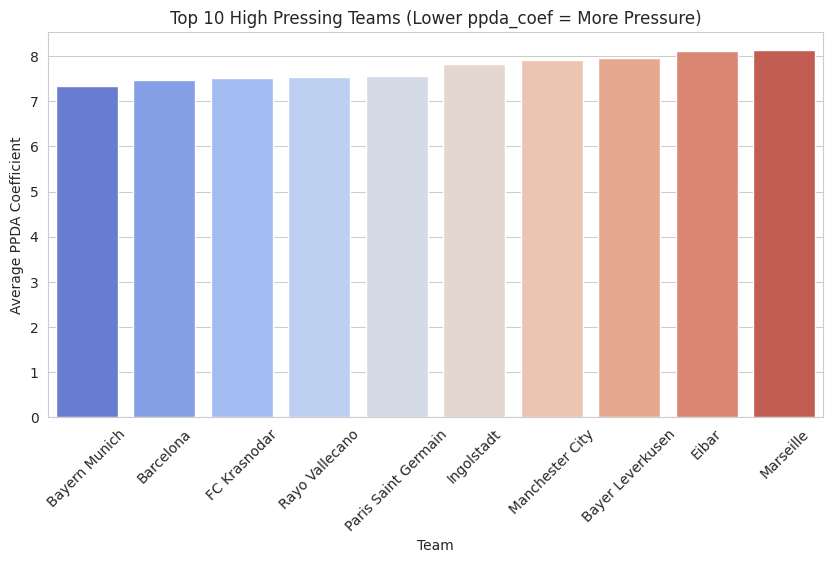

In [31]:
# Sorting teams by defensive pressing intensity (low ppda_coef means high pressure)
high_pressing_teams = df.groupby('team')['ppda_coef'].mean().sort_values().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=high_pressing_teams.index, y=high_pressing_teams.values, palette='coolwarm')
plt.title('Top 10 High Pressing Teams (Lower ppda_coef = More Pressure)')
plt.xlabel('Team')
plt.ylabel('Average PPDA Coefficient')
plt.xticks(rotation=45)
plt.show()

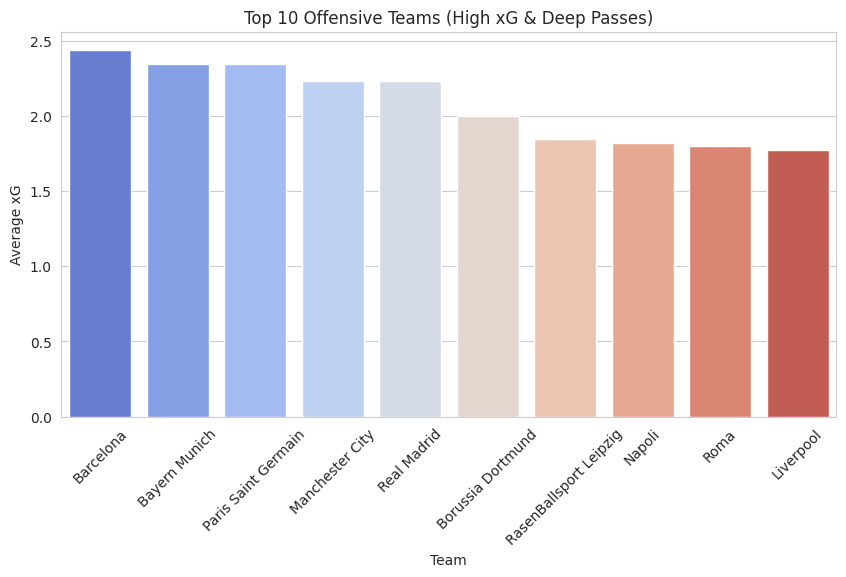

In [32]:
offensive_teams = df.groupby('team')[['xG', 'deep']].mean().sort_values('xG', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=offensive_teams.index, y=offensive_teams['xG'], palette='coolwarm')
plt.title('Top 10 Offensive Teams (High xG & Deep Passes)')
plt.xlabel('Team')
plt.ylabel('Average xG')
plt.xticks(rotation=45)
plt.show()

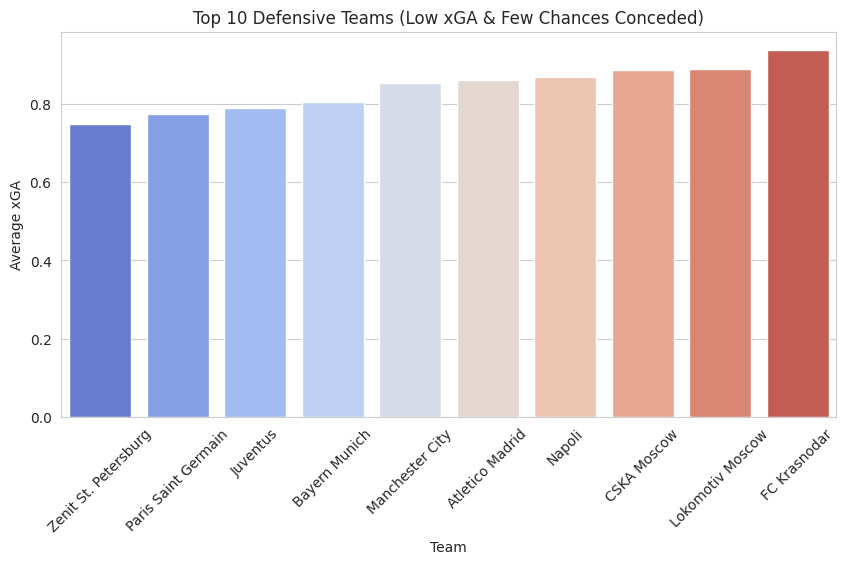

In [33]:
defensive_teams = df.groupby('team')[['xGA', 'deep_allowed']].mean().sort_values('xGA', ascending=True).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=defensive_teams.index, y=defensive_teams['xGA'], palette='coolwarm')
plt.title('Top 10 Defensive Teams (Low xGA & Few Chances Conceded)')
plt.xlabel('Team')
plt.ylabel('Average xGA')
plt.xticks(rotation=45)
plt.show()

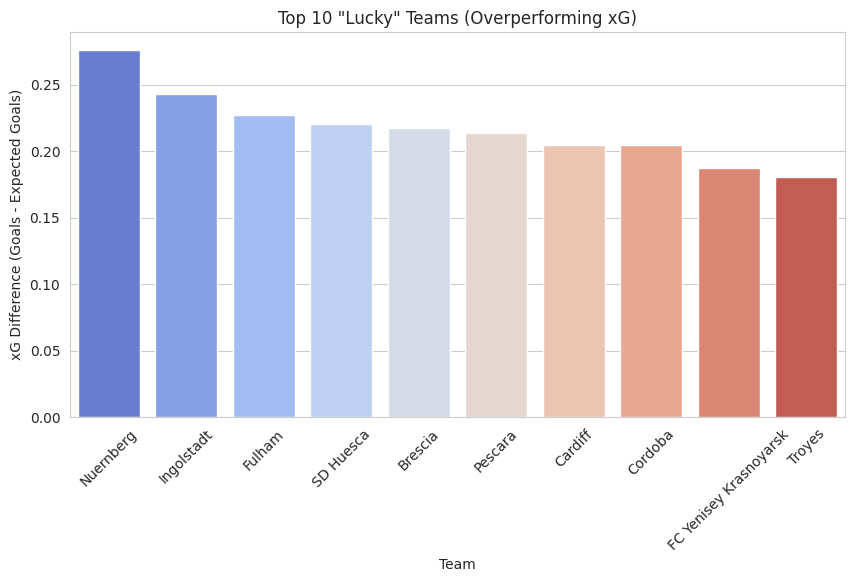

In [34]:
overperforming_teams = df.groupby('team')['xG_diff'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=overperforming_teams.index, y=overperforming_teams.values, palette='coolwarm')
plt.title('Top 10 "Lucky" Teams (Overperforming xG)')
plt.xlabel('Team')
plt.ylabel('xG Difference (Goals - Expected Goals)')
plt.xticks(rotation=45)
plt.show()

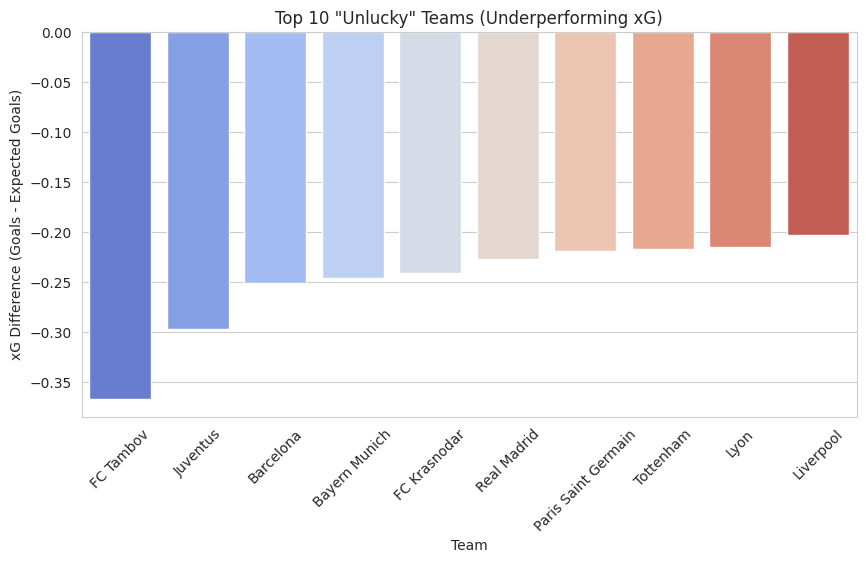

In [35]:
underperforming_teams = df.groupby('team')['xG_diff'].mean().sort_values().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=underperforming_teams.index, y=underperforming_teams.values, palette='coolwarm')
plt.title('Top 10 "Unlucky" Teams (Underperforming xG)')
plt.xlabel('Team')
plt.ylabel('xG Difference (Goals - Expected Goals)')
plt.xticks(rotation=45)
plt.show()

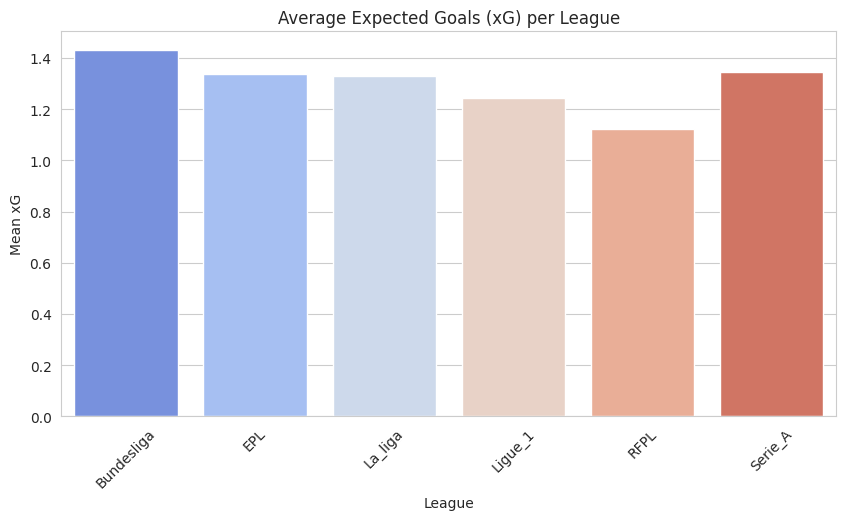

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('league')['xG'].mean().index, y=df.groupby('league')['xG'].mean().values, palette='coolwarm')
plt.title('Average Expected Goals (xG) per League')
plt.xlabel('League')
plt.ylabel('Mean xG')
plt.xticks(rotation=45)
plt.show()

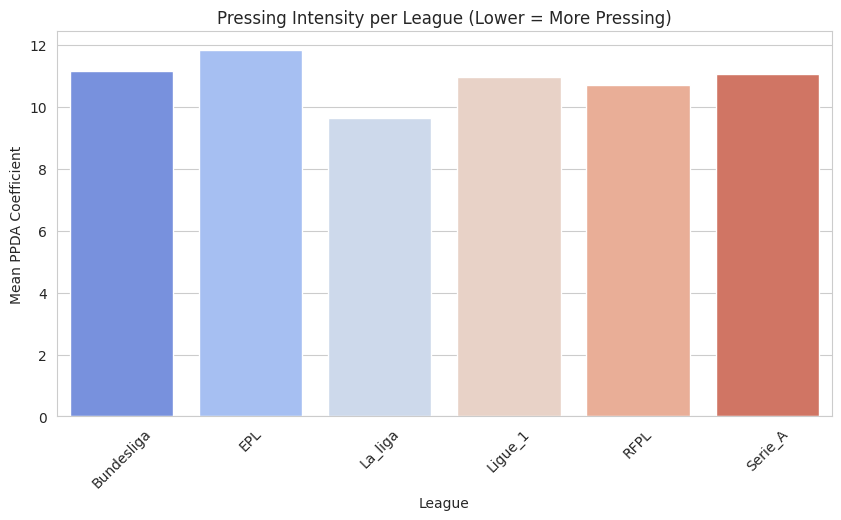

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('league')['ppda_coef'].mean().index, y=df.groupby('league')['ppda_coef'].mean().values, palette='coolwarm')
plt.title('Pressing Intensity per League (Lower = More Pressing)')
plt.xlabel('League')
plt.ylabel('Mean PPDA Coefficient')
plt.xticks(rotation=45)
plt.show()

### STASTICAL MEASURES

In [38]:
from scipy.stats import norm

In [39]:
team_name = "Manchester United"
team_xG = df[df['team'] == team_name]['xG']

# Population (League) Mean and Std Dev
pop_mean = df['xG'].mean()
pop_std = df['xG'].std()

# Z-score
n = len(team_xG)
z_score = (team_xG.mean() - pop_mean) / (pop_std / np.sqrt(n))

# P-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
print(f"Z-score: {z_score}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print(f"{team_name} has a statistically significant difference in xG compared to the league average.")
else:
    print(f"{team_name}'s xG is not significantly different from the league average.")

Z-score: 4.12895883621988, P-value: 3.644096304644684e-05
Manchester United has a statistically significant difference in xG compared to the league average.


In [40]:
from scipy.stats import chi2_contingency


df['ppda_bin'] = pd.qcut(df['ppda_coef'], q=4, labels=["Low", "Medium", "High", "Very High"])
contingency_table = pd.crosstab(df['ppda_bin'], df['result'])

# Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Pressing intensity is significantly related to match results.")
else:
    print("No significant relationship between pressing and match results.")

Chi-Square Statistic: 235.49493004306228, P-value: 5.142510412124689e-48
Pressing intensity is significantly related to match results.


In [41]:
from scipy.stats import f_oneway

# Extract unique leagues
leagues = df['league'].unique()

# Group xG by leagues
xG_by_league = [df[df['league'] == league]['xG'] for league in leagues]

# Perform ANOVA test
anova_result = f_oneway(*xG_by_league)
print(f"ANOVA Test P-value: {anova_result.pvalue}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("There is a significant difference in xG between leagues.")
else:
    print("No significant difference in xG between leagues.")


ANOVA Test P-value: 1.4644533608173996e-55
There is a significant difference in xG between leagues.


In [42]:
from scipy.stats import ttest_1samp

team_name = "Barcelona"
team_xG_diff = df[df['team'] == team_name]['xG_diff']

# One-sample t-test
t_stat, p_value = ttest_1samp(team_xG_diff, 0)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print(f"{team_name} significantly over/underperforms compared to expected goals.")
else:
    print(f"{team_name} performs as expected in terms of xG.")


T-statistic: -3.010012147922868, P-value: 0.002907613064546133
Barcelona significantly over/underperforms compared to expected goals.
